In [1]:
import os
os.getcwd()

'C:\\Users\\win 10\\Desktop\\M.L\\Project\\PythonCode'

In [2]:
os.chdir("C:/Users/win 10/Desktop/M.L/Project/Dataset")

In [3]:
os.getcwd()

'C:\\Users\\win 10\\Desktop\\M.L\\Project\\Dataset'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv("kidney_disease.csv")

In [6]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [7]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

# Visualisation

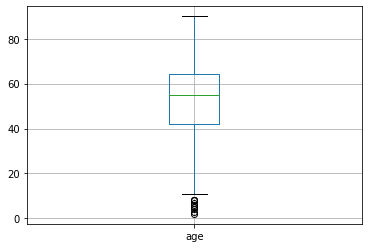

In [8]:
data.boxplot(column='age')

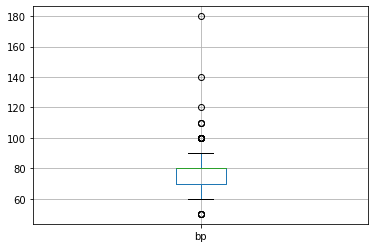

In [9]:
data.boxplot(column='bp')

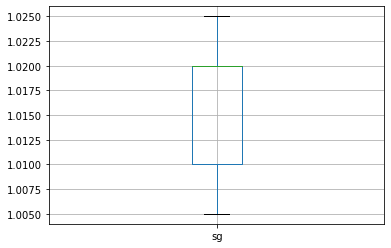

In [10]:
data.boxplot(column='sg')

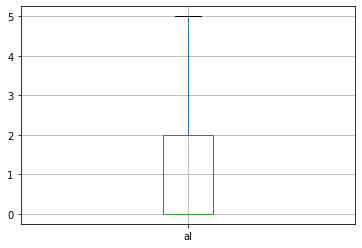

In [11]:
data.boxplot(column='al')

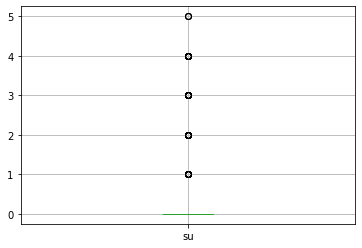

In [12]:
data.boxplot(column='su')

# Handling missing values

In [13]:
data.apply(lambda x: sum(x.isnull()),axis=0)

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [14]:
#Create a list of columns to retain
columns_to_retain = ["sg", "al", "sc", "hemo",
                         "pcv", "wbcc", "rbcc", "htn", "classification"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
data = data.drop([col for col in data.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
data = data.dropna(axis=0)

# Label encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder_le = LabelEncoder()


In [16]:
for column in data.columns:
        if data[column].dtype == np.number:
            continue
        
        data[column] = LabelEncoder().fit_transform(data[column])

In [17]:
data.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


# Feature Scaling

In [18]:
X = data.drop(["classification"], axis=1)
y = data["classification"]

In [19]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

# Splitting the dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

# Model Building

In [26]:
import keras as k
from keras.models import Sequential, load_model
from keras.layers import Dense
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=X_train.shape[0]) 

Epoch 1/2000
229/229 [==============================] - 1s 5ms/step - loss: 0.7052 - accuracy: 0.3493
Epoch 2/2000
229/229 [==============================] - 0s 34us/step - loss: 0.6980 - accuracy: 0.4760
Epoch 3/2000
229/229 [==============================] - 0s 9us/step - loss: 0.6908 - accuracy: 0.5240
Epoch 4/2000
229/229 [==============================] - 0s 24us/step - loss: 0.6838 - accuracy: 0.6114
Epoch 5/2000
229/229 [==============================] - 0s 11us/step - loss: 0.6769 - accuracy: 0.8646
Epoch 6/2000
229/229 [==============================] - 0s 39us/step - loss: 0.6701 - accuracy: 0.9170
Epoch 7/2000
229/229 [==============================] - 0s 18us/step - loss: 0.6634 - accuracy: 0.9083
Epoch 8/2000
229/229 [==============================] - 0s 9us/step - loss: 0.6567 - accuracy: 0.9127
Epoch 9/2000
229/229 [==============================] - 0s 12us/step - loss: 0.6501 - accuracy: 0.9083
Epoch 10/2000
229/229 [==============================] - 0s 21us/step - loss

Epoch 81/2000
229/229 [==============================] - 0s 23us/step - loss: 0.1912 - accuracy: 0.9170
Epoch 82/2000
229/229 [==============================] - 0s 15us/step - loss: 0.1872 - accuracy: 0.9170
Epoch 83/2000
229/229 [==============================] - 0s 20us/step - loss: 0.1835 - accuracy: 0.9170
Epoch 84/2000
229/229 [==============================] - 0s 23us/step - loss: 0.1801 - accuracy: 0.9170
Epoch 85/2000
229/229 [==============================] - 0s 14us/step - loss: 0.1769 - accuracy: 0.9170
Epoch 86/2000
229/229 [==============================] - 0s 13us/step - loss: 0.1738 - accuracy: 0.9170
Epoch 87/2000
229/229 [==============================] - 0s 21us/step - loss: 0.1708 - accuracy: 0.9170
Epoch 88/2000
229/229 [==============================] - 0s 13us/step - loss: 0.1680 - accuracy: 0.9170
Epoch 89/2000
229/229 [==============================] - 0s 7us/step - loss: 0.1653 - accuracy: 0.9170
Epoch 90/2000
229/229 [==============================] - 0s 9us/s

Epoch 160/2000
229/229 [==============================] - 0s 12us/step - loss: 0.0761 - accuracy: 0.9651
Epoch 161/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0756 - accuracy: 0.9651
Epoch 162/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0751 - accuracy: 0.9651
Epoch 163/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0746 - accuracy: 0.9651
Epoch 164/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0741 - accuracy: 0.9651
Epoch 165/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0737 - accuracy: 0.9651
Epoch 166/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0732 - accuracy: 0.9651
Epoch 167/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0728 - accuracy: 0.9651
Epoch 168/2000
229/229 [==============================] - 0s 33us/step - loss: 0.0723 - accuracy: 0.9651
Epoch 169/2000
229/229 [==============================] -

Epoch 239/2000
229/229 [==============================] - 0s 12us/step - loss: 0.0477 - accuracy: 0.9825
Epoch 240/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0474 - accuracy: 0.9825
Epoch 241/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0471 - accuracy: 0.9869
Epoch 242/2000
229/229 [==============================] - 0s 6us/step - loss: 0.0468 - accuracy: 0.9869
Epoch 243/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0466 - accuracy: 0.9869
Epoch 244/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0463 - accuracy: 0.9869
Epoch 245/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0460 - accuracy: 0.9869
Epoch 246/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0457 - accuracy: 0.9869
Epoch 247/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0455 - accuracy: 0.9869
Epoch 248/2000
229/229 [==============================] -

Epoch 318/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0323 - accuracy: 0.9869
Epoch 319/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0322 - accuracy: 0.9869
Epoch 320/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0321 - accuracy: 0.9869
Epoch 321/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0319 - accuracy: 0.9869
Epoch 322/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0318 - accuracy: 0.9869
Epoch 323/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0317 - accuracy: 0.9869
Epoch 324/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0315 - accuracy: 0.9869
Epoch 325/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0314 - accuracy: 0.9869
Epoch 326/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0313 - accuracy: 0.9869
Epoch 327/2000
229/229 [==============================] 

Epoch 397/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0232 - accuracy: 0.9913
Epoch 398/2000
229/229 [==============================] - 0s 12us/step - loss: 0.0231 - accuracy: 0.9913
Epoch 399/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0230 - accuracy: 0.9913
Epoch 400/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0229 - accuracy: 0.9913
Epoch 401/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0228 - accuracy: 0.9913
Epoch 402/2000
229/229 [==============================] - 0s 34us/step - loss: 0.0227 - accuracy: 0.9913
Epoch 403/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0226 - accuracy: 0.9913
Epoch 404/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0225 - accuracy: 0.9913
Epoch 405/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0224 - accuracy: 0.9913
Epoch 406/2000
229/229 [==============================]

Epoch 476/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0172 - accuracy: 0.9913
Epoch 477/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0171 - accuracy: 0.9913
Epoch 478/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0171 - accuracy: 0.9913
Epoch 479/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0170 - accuracy: 0.9913
Epoch 480/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0170 - accuracy: 0.9913
Epoch 481/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0169 - accuracy: 0.9913
Epoch 482/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0169 - accuracy: 0.9913
Epoch 483/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0168 - accuracy: 0.9913
Epoch 484/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0168 - accuracy: 0.9913
Epoch 485/2000
229/229 [==============================] 

Epoch 555/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0141 - accuracy: 0.9913
Epoch 556/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0141 - accuracy: 0.9913
Epoch 557/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0141 - accuracy: 0.9913
Epoch 558/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0140 - accuracy: 0.9913
Epoch 559/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0140 - accuracy: 0.9913
Epoch 560/2000
229/229 [==============================] - 0s 36us/step - loss: 0.0140 - accuracy: 0.9913
Epoch 561/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0139 - accuracy: 0.9913
Epoch 562/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0139 - accuracy: 0.9913
Epoch 563/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0139 - accuracy: 0.9913
Epoch 564/2000
229/229 [==============================]

Epoch 634/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0114 - accuracy: 0.9913
Epoch 635/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0114 - accuracy: 0.9913
Epoch 636/2000
229/229 [==============================] - 0s 28us/step - loss: 0.0113 - accuracy: 0.9913
Epoch 637/2000
229/229 [==============================] - 0s 7us/step - loss: 0.0113 - accuracy: 0.9913
Epoch 638/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0113 - accuracy: 0.9913
Epoch 639/2000
229/229 [==============================] - 0s 28us/step - loss: 0.0113 - accuracy: 0.9913
Epoch 640/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0112 - accuracy: 0.9913
Epoch 641/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0112 - accuracy: 0.9913
Epoch 642/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0112 - accuracy: 0.9913
Epoch 643/2000
229/229 [==============================] -

Epoch 713/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0098 - accuracy: 0.9913
Epoch 714/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0098 - accuracy: 0.9913
Epoch 715/2000
229/229 [==============================] - 0s 28us/step - loss: 0.0098 - accuracy: 0.9913
Epoch 716/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0098 - accuracy: 0.9913
Epoch 717/2000
229/229 [==============================] - 0s 29us/step - loss: 0.0098 - accuracy: 0.9913
Epoch 718/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0097 - accuracy: 0.9913
Epoch 719/2000
229/229 [==============================] - 0s 27us/step - loss: 0.0097 - accuracy: 0.9913
Epoch 720/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0097 - accuracy: 0.9913
Epoch 721/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0097 - accuracy: 0.9913
Epoch 722/2000
229/229 [==============================] 

Epoch 792/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 793/2000
229/229 [==============================] - 0s 30us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 794/2000
229/229 [==============================] - 0s 12us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 795/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 796/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 797/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 798/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0086 - accuracy: 0.9956
Epoch 799/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0085 - accuracy: 0.9956
Epoch 800/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0085 - accuracy: 0.9956
Epoch 801/2000
229/229 [==============================] 

Epoch 871/2000
229/229 [==============================] - 0s 27us/step - loss: 0.0077 - accuracy: 0.9956
Epoch 872/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0077 - accuracy: 0.9956
Epoch 873/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 874/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 875/2000
229/229 [==============================] - 0s 7us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 876/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 877/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 878/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 879/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0076 - accuracy: 0.9956
Epoch 880/2000
229/229 [==============================] 

229/229 [==============================] - 0s 26us/step - loss: 0.0067 - accuracy: 0.9956
Epoch 950/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0067 - accuracy: 0.9956
Epoch 951/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0067 - accuracy: 0.9956
Epoch 952/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0067 - accuracy: 0.9956
Epoch 953/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 954/2000
229/229 [==============================] - 0s 30us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 955/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 956/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 957/2000
229/229 [==============================] - 0s 12us/step - loss: 0.0066 - accuracy: 0.9956
Epoch 958/2000
229/229 [==============================] - 0s 13us/step

Epoch 1027/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0060 - accuracy: 0.9956
Epoch 1028/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0060 - accuracy: 0.9956
Epoch 1029/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0060 - accuracy: 0.9956
Epoch 1030/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0060 - accuracy: 0.9956
Epoch 1031/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0060 - accuracy: 0.9956
Epoch 1032/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0060 - accuracy: 0.9956
Epoch 1033/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0060 - accuracy: 0.9956
Epoch 1034/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0060 - accuracy: 0.9956
Epoch 1035/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0060 - accuracy: 0.9956
Epoch 1036/2000
229/229 [=====================

Epoch 1105/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1106/2000
229/229 [==============================] - 0s 7us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1107/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1108/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1109/2000
229/229 [==============================] - 0s 23us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1110/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1111/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1112/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1113/2000
229/229 [==============================] - 0s 28us/step - loss: 0.0056 - accuracy: 0.9956
Epoch 1114/2000
229/229 [======================

Epoch 1183/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0052 - accuracy: 0.9956
Epoch 1184/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0052 - accuracy: 0.9956
Epoch 1185/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0052 - accuracy: 0.9956
Epoch 1186/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0052 - accuracy: 0.9956
Epoch 1187/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0052 - accuracy: 0.9956
Epoch 1188/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0052 - accuracy: 0.9956
Epoch 1189/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0052 - accuracy: 0.9956
Epoch 1190/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0052 - accuracy: 0.9956
Epoch 1191/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0052 - accuracy: 0.9956
Epoch 1192/2000
229/229 [=====================

Epoch 1261/2000
229/229 [==============================] - 0s 12us/step - loss: 0.0048 - accuracy: 0.9956
Epoch 1262/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0048 - accuracy: 0.9956
Epoch 1263/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0048 - accuracy: 0.9956
Epoch 1264/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0048 - accuracy: 0.9956
Epoch 1265/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0048 - accuracy: 0.9956
Epoch 1266/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0048 - accuracy: 0.9956
Epoch 1267/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0048 - accuracy: 0.9956
Epoch 1268/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0048 - accuracy: 0.9956
Epoch 1269/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0048 - accuracy: 0.9956
Epoch 1270/2000
229/229 [=====================

Epoch 1339/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0045 - accuracy: 0.9956
Epoch 1340/2000
229/229 [==============================] - 0s 12us/step - loss: 0.0045 - accuracy: 0.9956
Epoch 1341/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0045 - accuracy: 0.9956
Epoch 1342/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0045 - accuracy: 0.9956
Epoch 1343/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0045 - accuracy: 0.9956
Epoch 1344/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0045 - accuracy: 0.9956
Epoch 1345/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0045 - accuracy: 0.9956
Epoch 1346/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0045 - accuracy: 0.9956
Epoch 1347/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0045 - accuracy: 0.9956
Epoch 1348/2000
229/229 [=====================

Epoch 1417/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 1418/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 1419/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 1420/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 1421/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 1422/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 1423/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 1424/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 1425/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1426/2000
229/229 [======================

Epoch 1495/2000
229/229 [==============================] - 0s 27us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1496/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1497/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1498/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1499/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1500/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1501/2000
229/229 [==============================] - 0s 23us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1502/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1503/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1504/2000
229/229 [======================

Epoch 1573/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1574/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1575/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1576/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1577/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1578/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1579/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1580/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1581/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1582/2000
229/229 [=========================

Epoch 1651/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1652/2000
229/229 [==============================] - 0s 12us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1653/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1654/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1655/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1656/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1657/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1658/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1659/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1660/2000
229/229 [=====================

Epoch 1729/2000
229/229 [==============================] - 0s 12us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1730/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1731/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1732/2000
229/229 [==============================] - 0s 36us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1733/2000
229/229 [==============================] - 0s 23us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1734/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1735/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1736/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1737/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1738/2000
229/229 [=====================

Epoch 1807/2000
229/229 [==============================] - 0s 12us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 1808/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 1809/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1810/2000
229/229 [==============================] - 0s 33us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1811/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1812/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1813/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1814/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1815/2000
229/229 [==============================] - 0s 8us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1816/2000
229/229 [======================

Epoch 1885/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1886/2000
229/229 [==============================] - 0s 23us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1887/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1888/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1889/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1890/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1891/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1892/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1893/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1894/2000
229/229 [======================

Epoch 1963/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1964/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1965/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1966/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1967/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1968/2000
229/229 [==============================] - 0s 6us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1969/2000
229/229 [==============================] - 0s 11us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1970/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1971/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1972/2000
229/229 [======================

In [36]:
model.save("ckd.model")

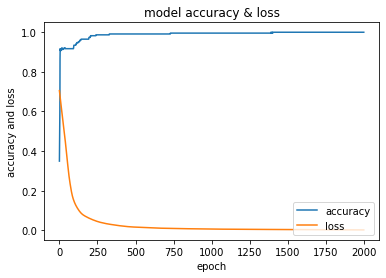

In [37]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['accuracy', 'loss'], loc='lower right')
plt.show()